In [112]:
# Load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset
data = pd.read_csv('googleplaystore.csv')

In [114]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [116]:
# 1- check for null values 
null_counts = data.isnull().sum()
print(null_counts)


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [118]:
# 2- Drop records with null
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [122]:
# 3- Correct data types and format 
# a- convert size
def convert_size(Size):
    if 'M' in Size:
        return float(Size.replace('M',''))*1000
    elif 'K' in Size:
        return float(Size.replace('K',''))
    return None
data['Size'] = data['Size'].apply(convert_size)


C:\Users\Dell\AppData\Local\Temp\ipykernel_3400\3179617776.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Size'] = data['Size'].apply(convert_size)


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            7466 non-null   float64
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1023.8+ KB


In [128]:
# b- convert reviews
data['Reviews'] = pd.to_numeric(data['Reviews'], errors= 'coerce')


C:\Users\Dell\AppData\Local\Temp\ipykernel_3400\2772166380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Reviews'] = pd.to_numeric(data['Reviews'], errors= 'coerce')


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Size            7466 non-null   float64
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1023.8+ KB


In [132]:
# c- convert installs 
data['Installs'] = data['Installs'].str.replace('+','').str.replace(',','').astype(int)

C:\Users\Dell\AppData\Local\Temp\ipykernel_3400\2940690018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Installs'] = data['Installs'].str.replace('+','').str.replace(',','').astype(int)


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Size            7466 non-null   float64
 5   Installs        9360 non-null   int32  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(9)
memory usage: 987.2+ KB


In [136]:
# d- convert price
data['Price'] = data['Price'].str.replace('$','').astype(float)

C:\Users\Dell\AppData\Local\Temp\ipykernel_3400\1105296496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = data['Price'].str.replace('$','').astype(float)


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Size            7466 non-null   float64
 5   Installs        9360 non-null   int32  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 987.2+ KB


In [ ]:
# 4- Sanity Checks 

In [140]:
# a- Drop invalid Ratings
data = data[(data['Rating'] >= 1) & (data['Rating'] <= 5)]

In [142]:
# b- Drop invalid reviews 
data = data[data['Reviews'] <= data['Installs']]

In [144]:
# c- Drop invalid prices for free apps 
data = data[~((data['Type'] == 'Free') & (data['Price'] > 0))]

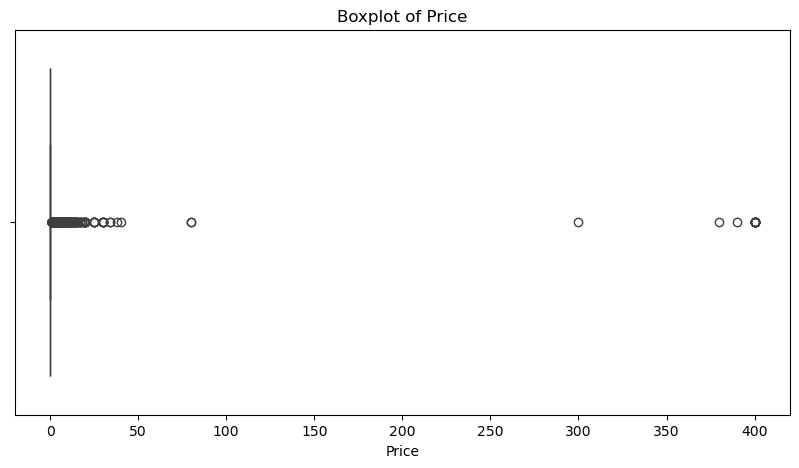

In [146]:
# 5- Univariate Analysis 

# Boxplot for Price
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Price'])
plt.title('Boxplot of Price')
plt.show()

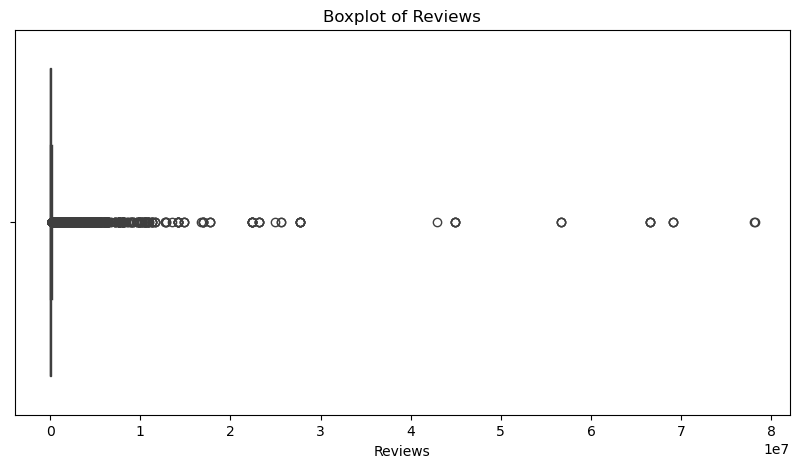

In [47]:
# Boxplot for Reviews
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Reviews'])
plt.title('Boxplot of Reviews')
plt.show()

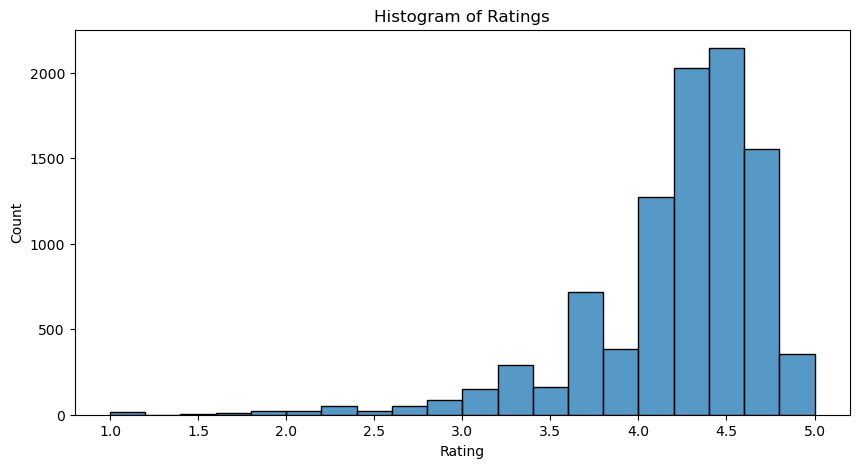

In [148]:
# Histogram for Rating
plt.figure(figsize=(10, 5))
sns.histplot(data['Rating'], bins=20)
plt.title('Histogram of Ratings')
plt.show()

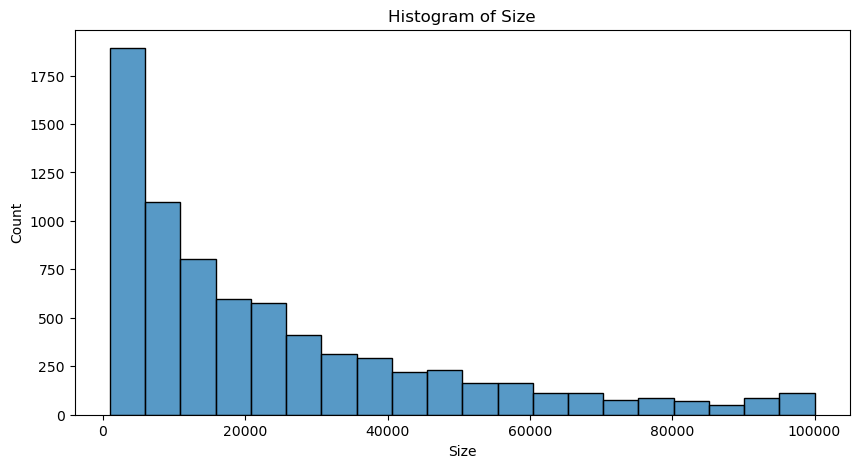

In [55]:
# Histogram for Size
plt.figure(figsize=(10, 5))
sns.histplot(data['Size'], bins=20)
plt.title('Histogram of Size')
plt.show()

In [150]:
# Step 6: Outlier treatment
# Drop high-priced apps (above $200)
data = data[data['Price'] < 200]

In [152]:
# Drop records having more than 2 million reviews
data = data[data['Reviews'] <= 2000000]

In [154]:
# Finding percentiles for 'Installs'
percentiles = data['Installs'].quantile([0.1, 0.25, 0.5, 0.7, 0.9, 0.95, 0.99])
print("Percentiles for Installs:\n", percentiles)

Percentiles for Installs:
 0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64


In [156]:
# Decide a threshold (let's say 95th percentile)
threshold_installs = percentiles[0.95]
data = data[data['Installs'] <= threshold_installs]

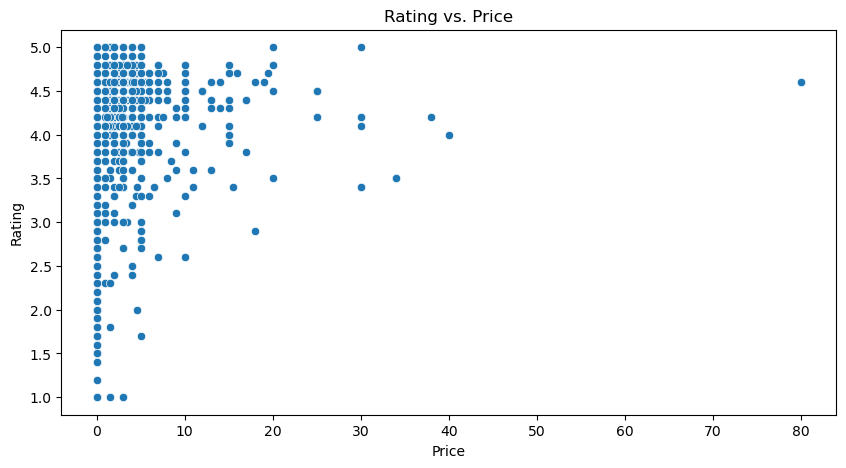

In [159]:
# Step 7: Bivariate analysis
# Scatter plot for Rating vs. Price
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Price', y='Rating', data=data)
plt.title('Rating vs. Price')
plt.show()

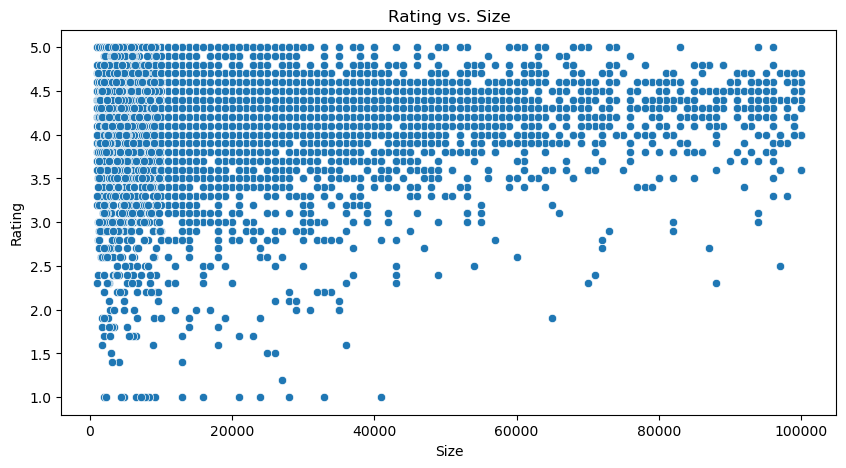

In [161]:
# Scatter plot for Rating vs. Size
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Size', y='Rating', data=data)
plt.title('Rating vs. Size')
plt.show()

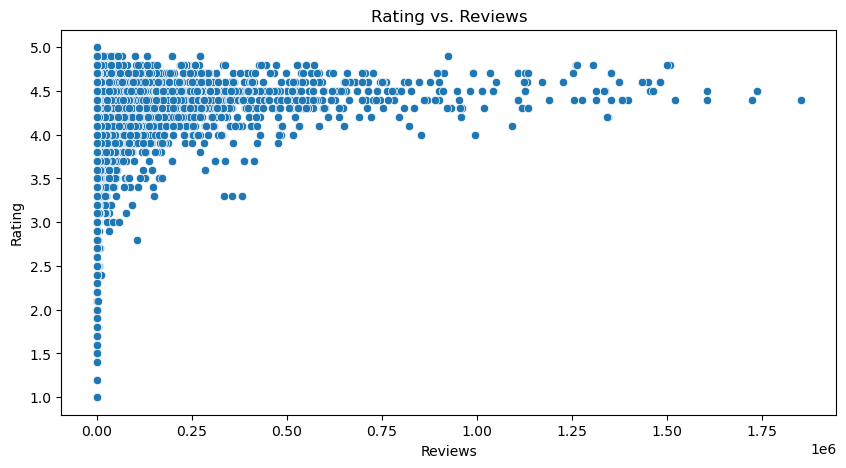

In [163]:
# Scatter plot for Rating vs. Reviews
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Reviews', y='Rating', data=data)
plt.title('Rating vs. Reviews')
plt.show()

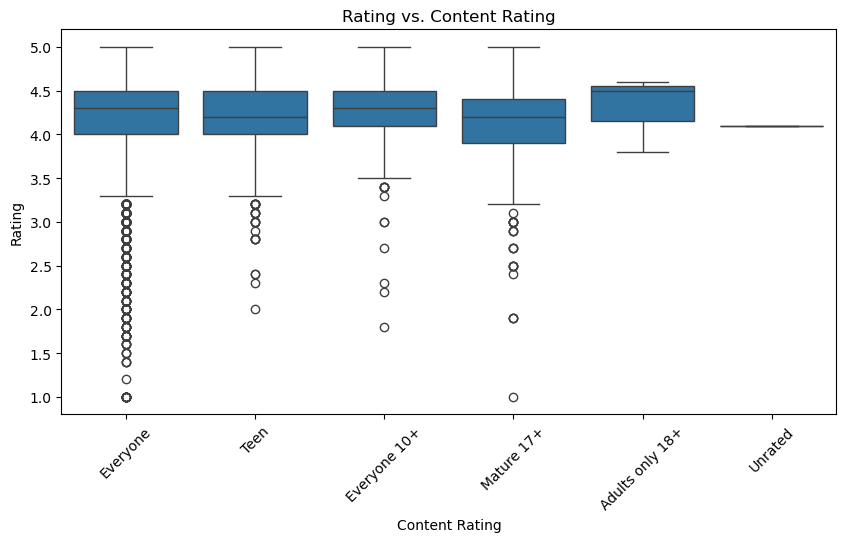

In [165]:
# Boxplot for Rating vs. Content Rating
plt.figure(figsize=(10, 5))
sns.boxplot(x='Content Rating', y='Rating', data=data)
plt.title('Rating vs. Content Rating')
plt.xticks(rotation=45)
plt.show()

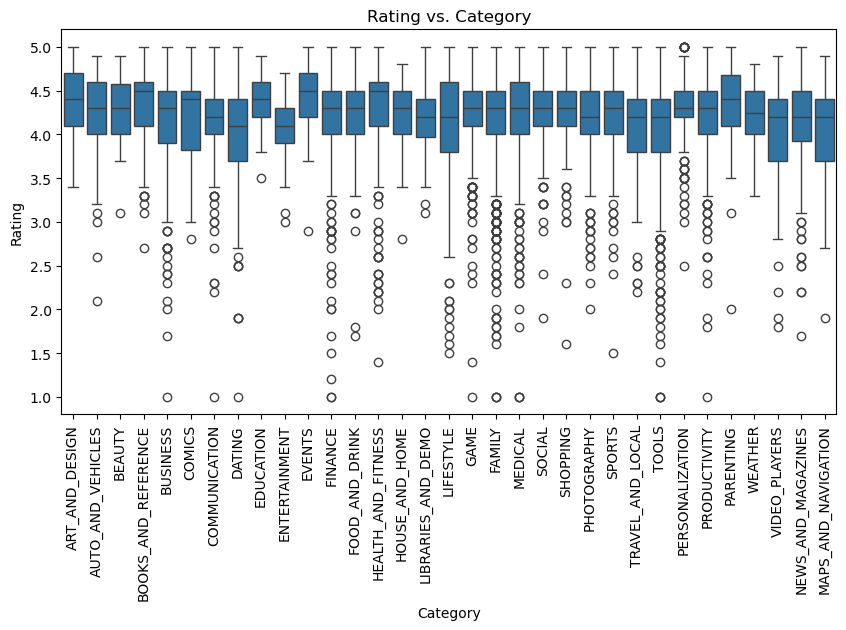

In [169]:
# Boxplot for Rating vs. Category
plt.figure(figsize=(10, 5))
sns.boxplot(x='Category', y='Rating', data=data)
plt.title('Rating vs. Category')
plt.xticks(rotation=90)
plt.show()

In [173]:
# Step 8: Data preprocessing
inp1 = data.copy()  # Create a copy for further processing

In [175]:
# Apply log transformation
inp1['Reviews'] = np.log1p(inp1['Reviews'])
inp1['Installs'] = np.log1p(inp1['Installs'])

In [177]:
# Drop unnecessary columns
inp1 = inp1.drop(columns=['App', 'Last Updated', 'Current Ver', 'Android Ver'])

In [179]:
# Get dummy variables
inp2 = pd.get_dummies(inp1, columns=['Category', 'Genres', 'Content Rating'], drop_first=True)

In [181]:
# Step 9: Train-test split
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(inp2, test_size=0.3, random_state=42)

In [183]:
# Step 10: Separate into features and target
X_train = df_train.drop(columns=['Rating'])
y_train = df_train['Rating']
X_test = df_test.drop(columns=['Rating'])
y_test = df_test['Rating']

In [195]:
# Ensure that all columns in X_train are numeric
print(X_train.dtypes)

Reviews                        float64
Size                           float64
Installs                       float64
Type                            object
Price                          float64
                                ...   
Content Rating_Everyone           bool
Content Rating_Everyone 10+       bool
Content Rating_Mature 17+         bool
Content Rating_Teen               bool
Content Rating_Unrated            bool
Length: 156, dtype: object


In [215]:
def convert_type(Type):
    if 'Free' in Type:
        return float(Type.replace('Free','0'))
    else:
        return None
X_train['Type'] = X_train['Type'].apply(convert_type)
#X_train['Type']= X_train['Type'].astype(float)

In [223]:
X_train.dtypes

Reviews                        float64
Size                           float64
Installs                       float64
Type                           float64
Price                          float64
                                ...   
Content Rating_Everyone           bool
Content Rating_Everyone 10+       bool
Content Rating_Mature 17+         bool
Content Rating_Teen               bool
Content Rating_Unrated            bool
Length: 156, dtype: object

In [227]:
X_train = X_train.dropna

In [ ]:
# Step 11: Model building
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Report R2 on the train set
train_r2 = model.score(X_train, y_train)
print("R2 score on train set:", train_r2)

In [ ]:
# Step 12: Predictions on test set
test_r2 = model.score(X_test, y_test)
print("R2 score on test set:", test_r2)